# Modèle de valorisation marché des stockages de gaz naturel 

#### _S. Partarrieu, Pa. Plessix, Y. Tchouboukoff_
##### Encadrant : _P. Abiven_
UE 22 - Python 
<center> <img src='img/e_cube.jpg' width = 100><img src='img/Mines_paristech-PSL.png' width = 300 align = center></center>

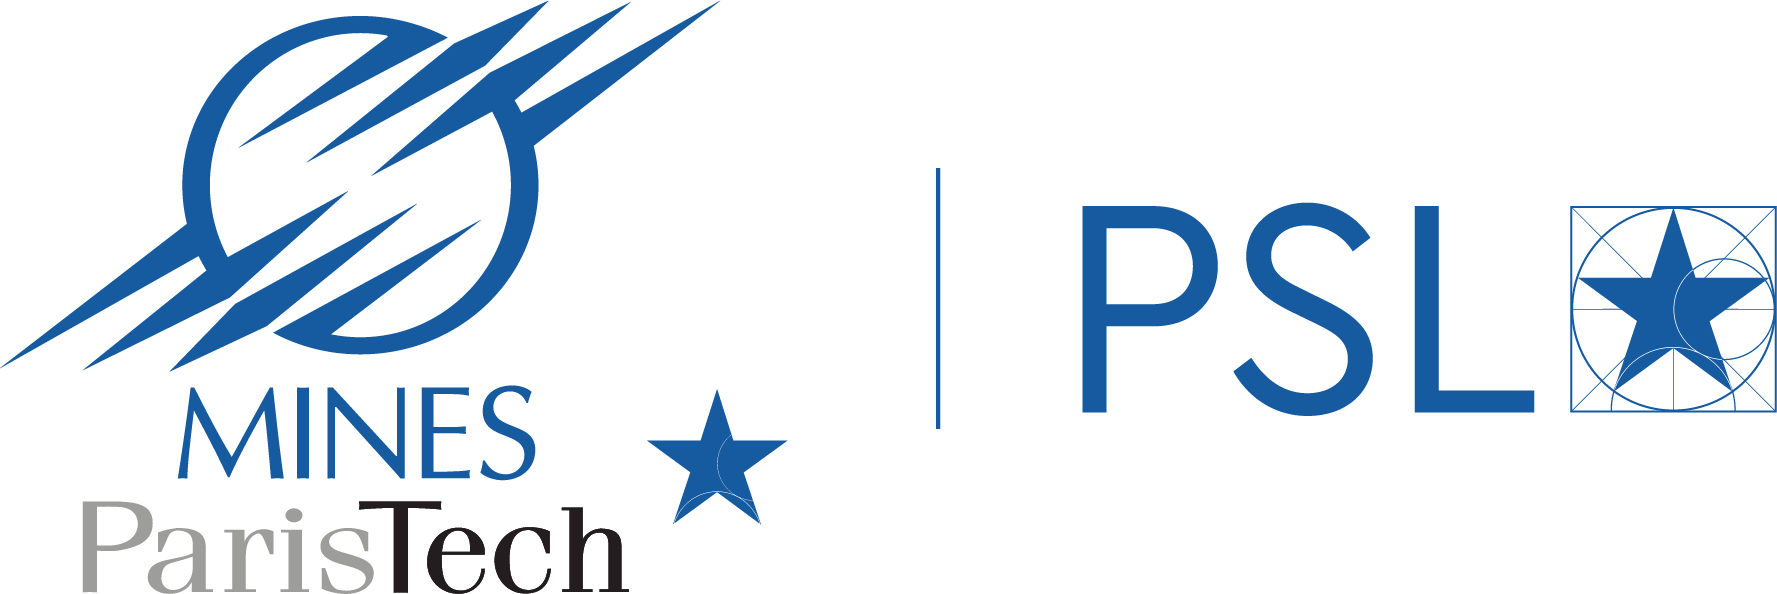## Le marché du Gaz Naturel